# Encuestas 02 - Análisis Exploratorio de Datos 

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [2]:
encuestas = pd.read_csv(r'Encuestas02.csv', encoding='latin1', sep=';')

In [3]:
encuestas.shape

(45, 11)

In [4]:
encuestas.head()

,Id_Encuesta,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,1,b,5,4,c,4,c,5,4,Aprendi a como la tecnologia puede ayudarnos e...,Muchas cosas.
1,2,c,4,5,c,4,c,5,4,Aprendi a explorar mi entorno para impulsarme ...,Presentar algunos ejemplos de problemas resuel...
2,3,c,5,5,c,5,c,4,5,Aprendi que con la ayuda de la tecnologia se p...,Mas tiempo y la interaccion al momento de expl...
3,4,c,5,4,c,5,c,5,5,Considero que lo mas valioso fue aprender de p...,Mejoraria en dar mas explicaciones y dedicar m...
4,5,c,3,4,c,4,c,3,4,A como crear herramientas para ayudar a la soc...,Trataria de implementar las herramientas que u...


In [211]:
respuestasP1 = encuestas["P1"].tolist()
respuestasP2 = encuestas["P2"].tolist()
respuestasP3 = encuestas["P3"].tolist()
respuestasP4 = encuestas["P4"].tolist()
respuestasP5 = encuestas["P5"].tolist()
respuestasP6 = encuestas["P6"].tolist()
respuestasP7 = encuestas["P7"].tolist()
respuestasP8 = encuestas["P8"].tolist()

respuestasP2 = list(map(int, respuestasP2))
respuestasP3 = list(map(int, respuestasP3))
respuestasP5 = list(map(int, respuestasP5))
respuestasP7 = list(map(int, respuestasP7))
respuestasP8 = list(map(int, respuestasP8))

countsP1 = [respuestasP1.count(op) for op in opciones]
countsP2 = [respuestasP2.count(i) for i in range(1, 6)]
countsP3 = [respuestasP3.count(i) for i in range(1, 6)]
countsP4 = [respuestasP4.count(op) for op in opciones]
countsP5 = [respuestasP5.count(i) for i in range(1, 6)]
countsP6 = [respuestasP6.count(op) for op in opciones]
countsP7 = [respuestasP7.count(i) for i in range(1, 6)]
countsP8 = [respuestasP8.count(i) for i in range(1, 6)]

etiquetasP1 = ['a - No','b - Algo más confiado','c - Si, mucho más confiado']
etiquetasP2 = ['1 - Muy mala', '2 - Mala', '3 - Regular', '4 - Buena', '5 - Excelente']
etiquetasP3 = ['1 - Nada clara', '2 - Poco clara', '3 - Algo clara', '4 - Clara', '5 - Muy clara']
etiquetasP4 = ['a - No','b - Un poco','c - Si, significativamente']
etiquetasP5 = ['1 - Muy insatisfecho', '2 - Insatisfecho', '3 - Neutral', '4 - Satisfecho', '5 - Muy satisfecho']
etiquetasP6 = ['a - No','b - Un poco','c - Si, bastante']
etiquetasP7 = ['1', '2', '3 - Algo probable', '4 - Probable', '5 - Muy probable']
etiquetasP8 = ['1 - Muy ineficiente', '2 - Ineficiente', '3 - Regular', '4 - Eficiente', '5 - Muy eficiente']


In [1]:
def analisisLikert(respuestas):
    conteo = Counter(respuestas)
    total = len(respuestas)
    media = np.mean(respuestas)
    mediana = np.median(respuestas)
    moda = max(conteo.items(), key=lambda x: x[1])[0]
    desviacion = np.std(respuestas)
    varianza = np.var(respuestas)

    print(f"Total de respuestas: {total}")
    print(f"Media: {media:.2f}")
    print(f"Mediana: {mediana}")
    print(f"Moda: {moda}")
    print(f"Desviación estándar: {desviacion:.2f}")
    print(f"Varianza: {varianza:.2f}")
    
    print("\nFrecuencia absoluta:")
    for valor in range(1, 6):
        print(f"  {valor}: {conteo.get(valor, 0)}")

    print("\nFrecuencia relativa:")
    for valor in range(1, 6):
        porcentaje = (conteo.get(valor, 0) / total) * 100
        print(f"  {valor}: {porcentaje:.2f}%")


def analisisOpciones(respuestas):
    total = len(respuestas)
    conteo = Counter(respuestas)
    print("Frecuencia absoluta:")
    for opcion in sorted(conteo):
        print(f"  {opcion}: {conteo[opcion]}")
    print("\nFrecuencia relativa:")
    for opcion in sorted(conteo):
        porcentaje = (conteo[opcion] / total) * 100
        print(f"  {opcion}: {porcentaje:.2f}%")


def graficarBarrasLikert(conteo, color):
    escalaLikert = [1, 2, 3, 4, 5]
    plt.bar(escalaLikert, conteo, color=color)
    plt.xlabel('Escala de Likert')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de respuestas')
    plt.show()


def graficarBarrasOpciones(conteo, color):
    opciones = ['a','b','c']
    plt.bar(opciones, conteo, color=color)
    plt.xlabel('Opciones')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de respuestas')
    plt.show()


def graficarPastel(conteo, etiquetas): 
    filteredCategories = [cat for cat, count in zip(etiquetas, conteo) if count > 0]
    filteredCounts = [count for count in conteo if count > 0]
    plt.figure(figsize=(5, 5))
    plt.pie(
        filteredCounts,
        labels=filteredCategories,
        autopct='%1.2f%%',
        startangle=90,
        colors=plt.cm.Pastel1.colors[:len(filteredCounts)]
    )
    plt.title('Distribución de respuestas')
    plt.axis('equal')
    plt.show()

---

### Pregunta 1

¿Después del Bootcamp, te sientes más confiado utilizando herramientas tecnológicas para resolver problemas?

- a = No 
- b = Algo más confiado   
- c = Si, mucho más confiado

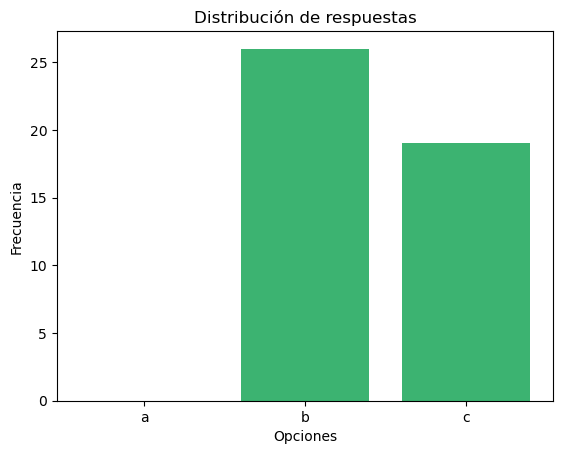

In [232]:
graficarBarrasOpciones(countsP1, 'mediumseagreen')

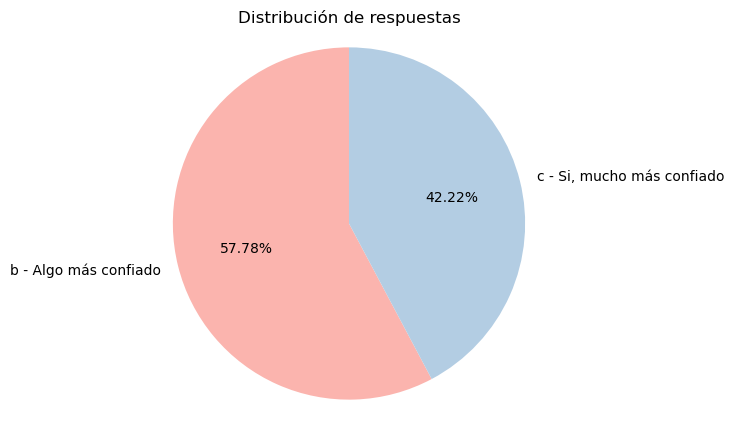

In [188]:
graficarPastel(countsP1, etiquetasP1)

In [116]:
analisisOpciones(respuestasP1)

Frecuencia absoluta:
  b: 26
  c: 19

Frecuencia relativa:
  b: 57.78%
  c: 42.22%


---

### Pregunta 2

¿Cómo calificarías tu experiencia trabajando en equipo durante la actividad?

- 1 - Muy mala
- 2 - Mala
- 3 - Regular
- 4 - Buena
- 5 - Excelente


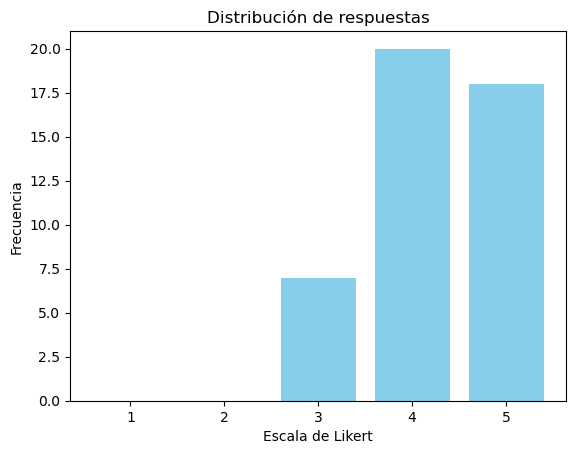

In [158]:
graficarBarrasLikert(countsP2,'skyblue')

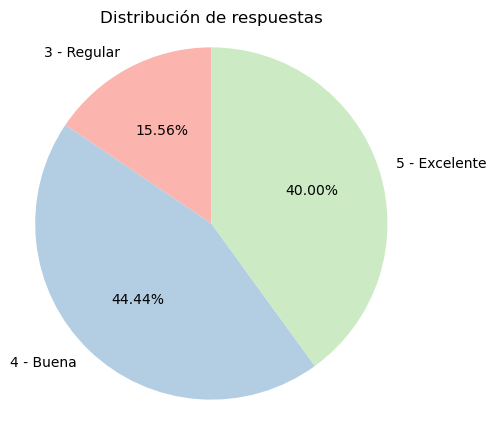

In [189]:
graficarPastel(countsP2, etiquetasP2)

In [156]:
analisisLikert(respuestasP2)

Total de respuestas: 45
Media: 4.24
Mediana: 4.0
Moda: 4
Desviación estándar: 0.70
Varianza: 0.50

Frecuencia absoluta:
  1: 0
  2: 0
  3: 7
  4: 20
  5: 18

Frecuencia relativa:
  1: 0.00%
  2: 0.00%
  3: 15.56%
  4: 44.44%
  5: 40.00%


---

### Pregunta 3

¿Qué tan clara te parece ahora la idea de que es y para qué sirve un prototipo tecnológico?

- 1 - Nada clara
- 2 - Poco clara
- 3 - Algo clara
- 4 - Clara
- 5 - Muy clara

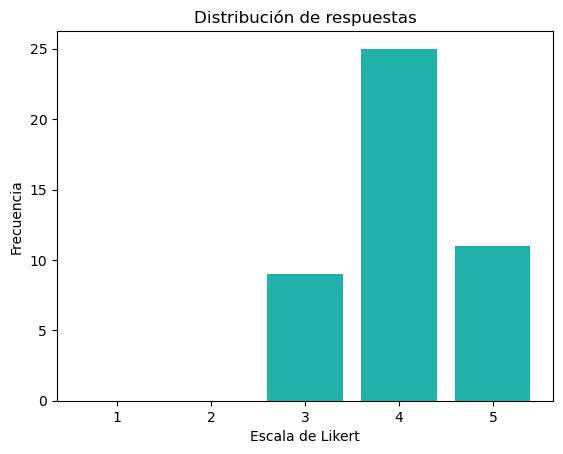

In [142]:
graficarBarrasLikert(countsP3,'lightseagreen')

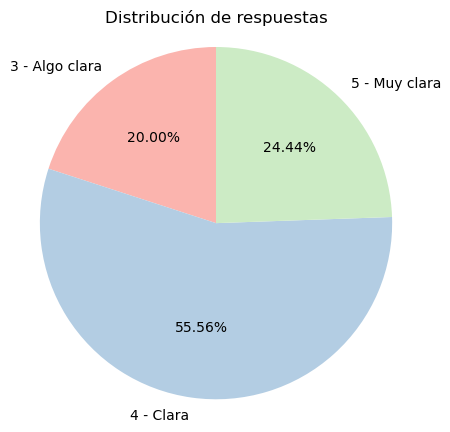

In [190]:
graficarPastel(countsP3, etiquetasP3)

In [181]:
analisisLikert(respuestasP3)

Total de respuestas: 45
Media: 4.04
Mediana: 4.0
Moda: 4
Desviación estándar: 0.67
Varianza: 0.44

Frecuencia absoluta:
  1: 0
  2: 0
  3: 9
  4: 25
  5: 11

Frecuencia relativa (%):
  1: 0.00%
  2: 0.00%
  3: 20.00%
  4: 55.56%
  5: 24.44%


---

### Pregunta 4

¿Sientes que mejoraste en tu capacidad de identificar problemas y proponer soluciones tecnológicas?

- a = No 
- b = Un poco 
- c = Si, significativamente


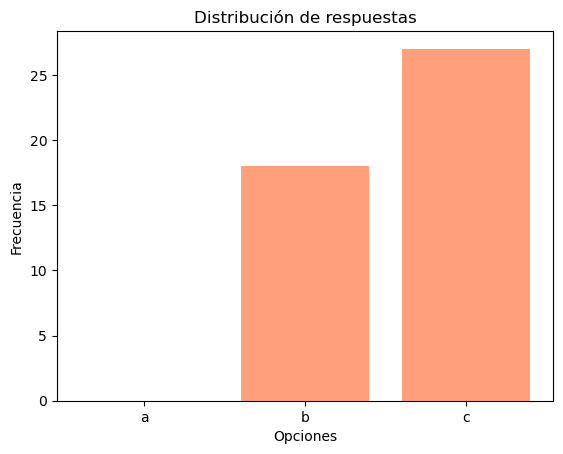

In [196]:
graficarBarrasOpciones(countsP4, 'lightsalmon')

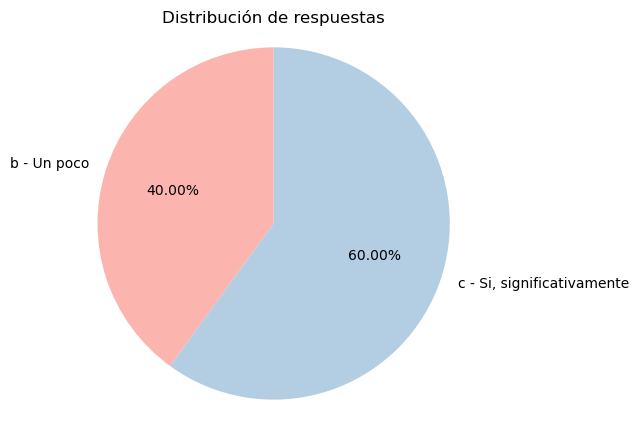

In [197]:
graficarPastel(countsP4, etiquetasP4)

In [198]:
analisisOpciones(respuestasP4)

Frecuencia absoluta:
  b: 18
  c: 27

Frecuencia relativa:
  b: 40.00%
  c: 60.00%


---

### Pregunta 5

¿Qué tan satisfecho estas con los conocimientos adquiridos durante el Bootcamp?

- 1 - Muy insatisfecho
- 2 - Insatisfecho
- 3 - Neutral
- 4 - Satisfecho
- 5 - Muy satisfecho


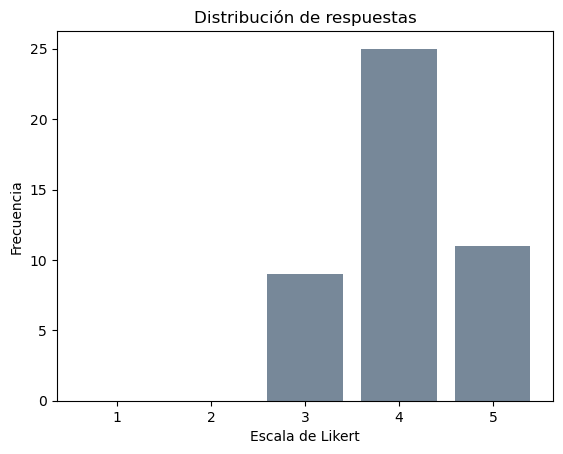

In [224]:
graficarBarrasLikert(countsP5,'lightslategray')

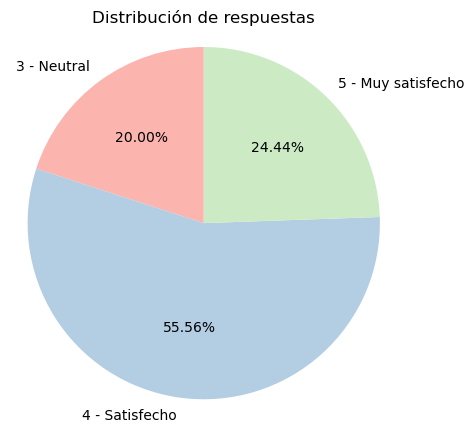

In [200]:
graficarPastel(countsP5, etiquetasP5)

In [201]:
analisisLikert(respuestasP5)

Total de respuestas: 45
Media: 4.04
Mediana: 4.0
Moda: 4
Desviación estándar: 0.67
Varianza: 0.44

Frecuencia absoluta:
  1: 0
  2: 0
  3: 9
  4: 25
  5: 11

Frecuencia relativa:
  1: 0.00%
  2: 0.00%
  3: 20.00%
  4: 55.56%
  5: 24.44%


---

### Pregunta 6

¿Crees que las actividades del Bootcamp fomentaron tu creatividad e innovación? 

- a = No 
- b = Un poco 
- c = Si, bastante


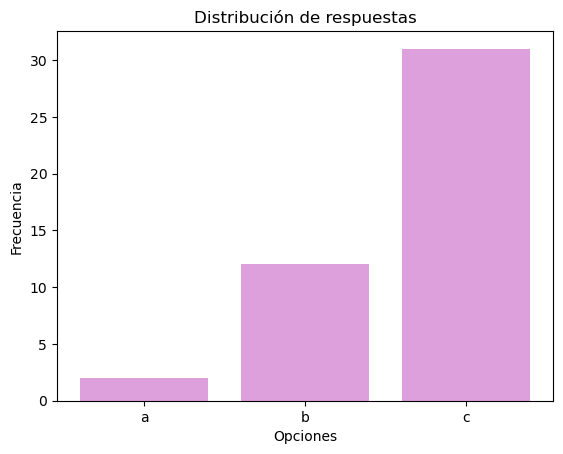

In [230]:
graficarBarrasOpciones(countsP6, 'plum')

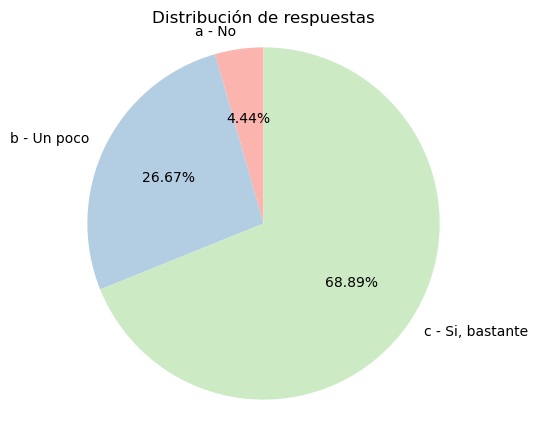

In [203]:
graficarPastel(countsP6, etiquetasP6)

In [204]:
analisisOpciones(respuestasP6)

Frecuencia absoluta:
  a: 2
  b: 12
  c: 31

Frecuencia relativa:
  a: 4.44%
  b: 26.67%
  c: 68.89%


---

### Pregunta 7

¿Qué tan probable es que apliques lo aprendido en futuros proyectos escolares o personales?

- 1 - Nada probable
- 2 - Poco probable
- 3 - Algo probable
- 4 - Probable
- 5 - Muy probable


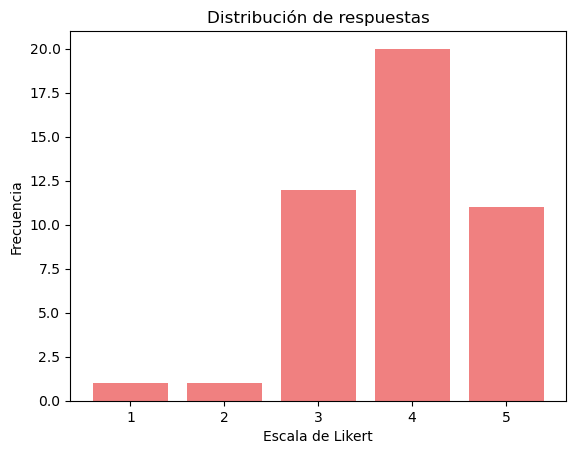

In [219]:
graficarBarrasLikert(countsP7,'lightcoral')

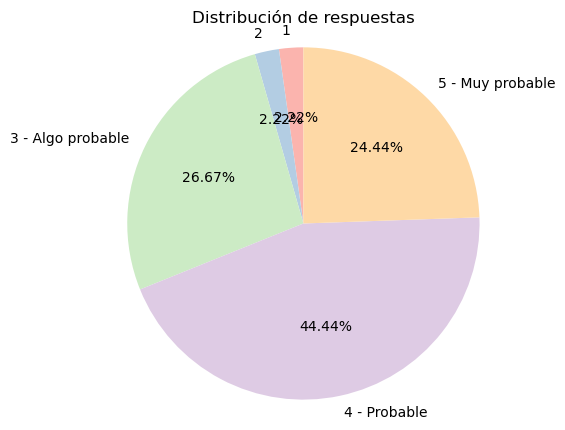

In [212]:
graficarPastel(countsP7, etiquetasP7)

In [207]:
analisisLikert(respuestasP7)

Total de respuestas: 45
Media: 3.87
Mediana: 4.0
Moda: 4
Desviación estándar: 0.88
Varianza: 0.78

Frecuencia absoluta:
  1: 1
  2: 1
  3: 12
  4: 20
  5: 11

Frecuencia relativa:
  1: 2.22%
  2: 2.22%
  3: 26.67%
  4: 44.44%
  5: 24.44%


---

### Pregunta 8

¿Cómo evalúas la metodología utilizada durante el Bootcamp para el desarrollo de prototipos?

- 1 - Muy ineficiente
- 2 - Ineficiente
- 3 - Regular
- 4 - Eficiente
- 5 - Muy eficiente


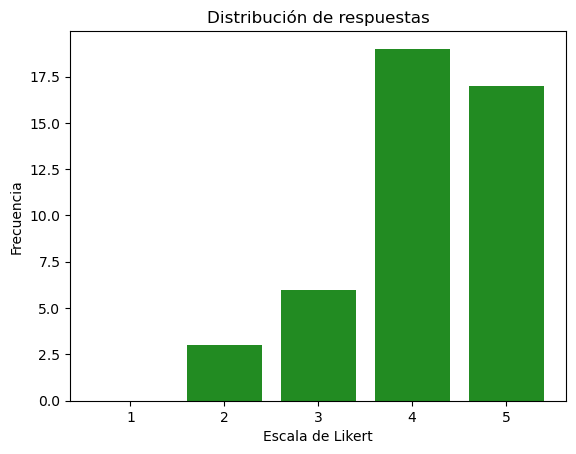

In [228]:
graficarBarrasLikert(countsP8,'forestgreen')

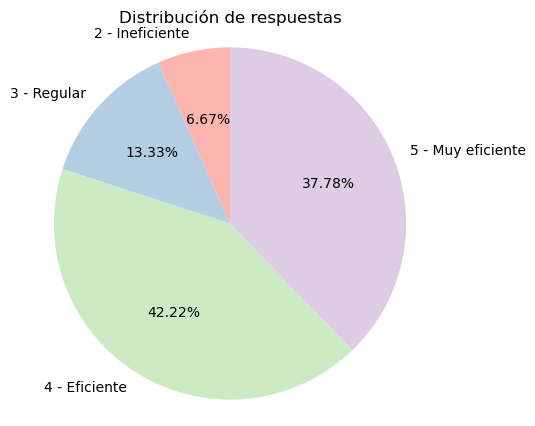

In [209]:
graficarPastel(countsP8, etiquetasP8)

In [210]:
analisisLikert(respuestasP8)

Total de respuestas: 45
Media: 4.11
Mediana: 4.0
Moda: 4
Desviación estándar: 0.87
Varianza: 0.77

Frecuencia absoluta:
  1: 0
  2: 3
  3: 6
  4: 19
  5: 17

Frecuencia relativa:
  1: 0.00%
  2: 6.67%
  3: 13.33%
  4: 42.22%
  5: 37.78%
